In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv("C:\\Users\\Murali krishna\\Downloads\\archive (2)\\Train.csv")
test = pd.read_csv("C:\\Users\\Murali krishna\\Downloads\\archive (2)\\Test.csv")

In [3]:
train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [4]:
train.shape

(8068, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [7]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

### Replacing missing values

In [8]:
mode=train['Spending_Score'].mode().values[0]
train['Spending_Score']=train['Spending_Score'].replace(np.nan,mode)

In [9]:
mode=train['Ever_Married'].mode().values[0]
train['Ever_Married']=train['Ever_Married'].replace(np.nan,mode)

In [10]:
mode=train['Graduated'].mode().values[0]
train['Graduated']=train['Graduated'].replace(np.nan,mode)

In [11]:
mode=train['Profession'].mode().values[0]
train['Profession']=train['Profession'].replace(np.nan,mode)

In [12]:
mode=train['Work_Experience'].mode().values[0]
train['Work_Experience']=train['Work_Experience'].replace(np.nan,mode)

In [13]:
mode=train['Var_1'].mode().values[0]
train['Var_1']=train['Var_1'].replace(np.nan,mode)

In [14]:
train['Family_Size']=train['Family_Size'].replace(to_replace=0, value=np.nan)
train['Family_Size']=train['Family_Size'].astype(float)
mean=train['Family_Size'].mean()
train['Family_Size'].replace(np.nan,mean,inplace=True)

In [15]:
train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [16]:
train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


### Checking Duplicated values

In [17]:
duplicate=train.duplicated()
print(duplicate.sum())
train[duplicate]

0


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


### Label Encoding

In [18]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Choose your gender'.
train['Gender']= label_encoder.fit_transform(train['Gender'])
  
train['Gender'].unique()

array([1, 0])

In [19]:
train['Ever_Married']= label_encoder.fit_transform(train['Ever_Married'])
train['Ever_Married'].unique()

array([0, 1])

In [20]:
train['Graduated']= label_encoder.fit_transform(train['Graduated'])
train['Graduated'].unique()

array([0, 1])

In [21]:
train['Profession']= label_encoder.fit_transform(train['Profession'])
train['Profession'].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8])

In [22]:
train['Spending_Score']= label_encoder.fit_transform(train['Spending_Score'])
train['Spending_Score'].unique()

array([2, 0, 1])

In [23]:
train['Var_1']= label_encoder.fit_transform(train['Var_1'])
train['Var_1'].unique()

array([3, 5, 6, 2, 0, 1, 4])

In [24]:
train['Segmentation']= label_encoder.fit_transform(train['Segmentation'])
train['Segmentation'].unique()

array([3, 0, 1, 2])

### Removing Outliers

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [26]:
lowage,uppage=remove_outlier(train['Age'])
train["Age"]=np.where(train['Age']>uppage,uppage,train['Age'])
train["Age"]=np.where(train['Age']<lowage,lowage,train['Age'])

In [27]:
lowage,uppage=remove_outlier(train['Ever_Married'])
train["Ever_Married"]=np.where(train['Ever_Married']>uppage,uppage,train['Ever_Married'])
train["Ever_Married"]=np.where(train['Ever_Married']<lowage,lowage,train['Ever_Married'])

In [28]:
lowage,uppage=remove_outlier(train['Graduated'])
train["Graduated"]=np.where(train['Graduated']>uppage,uppage,train['Graduated'])
train["Graduated"]=np.where(train['Graduated']<lowage,lowage,train['Graduated'])

In [29]:
lowage,uppage=remove_outlier(train['Profession'])
train["Profession"]=np.where(train['Profession']>uppage,uppage,train['Profession'])
train["Profession"]=np.where(train['Profession']<lowage,lowage,train['Profession'])

In [30]:
lowage,uppage=remove_outlier(train['Work_Experience'])
train["Work_Experience"]=np.where(train['Work_Experience']>uppage,uppage,train['Work_Experience'])
train["Work_Experience"]=np.where(train['Work_Experience']<lowage,lowage,train['Work_Experience'])

In [31]:
lowage,uppage=remove_outlier(train['Spending_Score'])
train["Spending_Score"]=np.where(train['Spending_Score']>uppage,uppage,train['Spending_Score'])
train["Spending_Score"]=np.where(train['Spending_Score']<lowage,lowage,train['Spending_Score'])

In [32]:
lowage,uppage=remove_outlier(train['Family_Size'])
train["Family_Size"]=np.where(train['Family_Size']>uppage,uppage,train['Family_Size'])
train["Family_Size"]=np.where(train['Family_Size']<lowage,lowage,train['Family_Size'])

In [33]:
lowage,uppage=remove_outlier(train['Var_1'])
train["Var_1"]=np.where(train['Var_1']>uppage,uppage,train['Var_1'])
train["Var_1"]=np.where(train['Var_1']<lowage,lowage,train['Var_1'])

In [34]:
lowage,uppage=remove_outlier(train['Segmentation'])
train["Segmentation"]=np.where(train['Segmentation']>uppage,uppage,train['Segmentation'])
train["Segmentation"]=np.where(train['Segmentation']<lowage,lowage,train['Segmentation'])

### Scaling the data using MinMax Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Work_Experience','Family_Size']

train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])
train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22.0,0.0,5.0,0.1,2.0,0.500000,3.0,3.0
1,462643,0,1.0,38.0,1.0,2.0,0.1,0.0,0.333333,3.0,0.0
2,466315,0,1.0,67.0,1.0,2.0,0.1,2.0,0.000000,5.0,1.0
3,461735,1,1.0,67.0,1.0,7.0,0.0,1.0,0.166667,5.0,1.0
4,462669,0,1.0,40.0,1.0,3.0,0.1,1.0,0.833333,5.0,0.0
5,461319,1,1.0,56.0,0.0,0.0,0.0,0.0,0.166667,5.0,2.0
6,460156,1,0.0,32.0,1.0,5.0,0.1,2.0,0.333333,5.0,2.0
7,464347,0,0.0,33.0,1.0,5.0,0.1,2.0,0.333333,5.0,3.0
8,465015,0,1.0,61.0,1.0,2.0,0.0,2.0,0.333333,6.0,3.0
9,465176,0,1.0,55.0,1.0,0.0,0.1,0.0,0.500000,5.0,2.0


### KMeans Clustering

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))
    wcss.append(kmeans.inertia_)

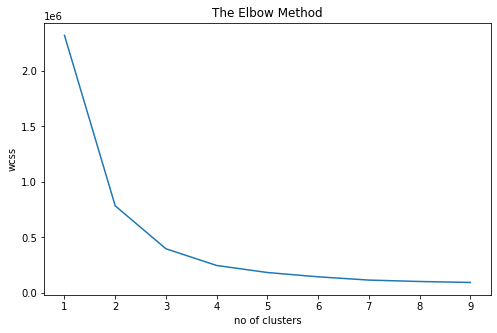

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
#pip install kneed

In [40]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
kl.elbow

3

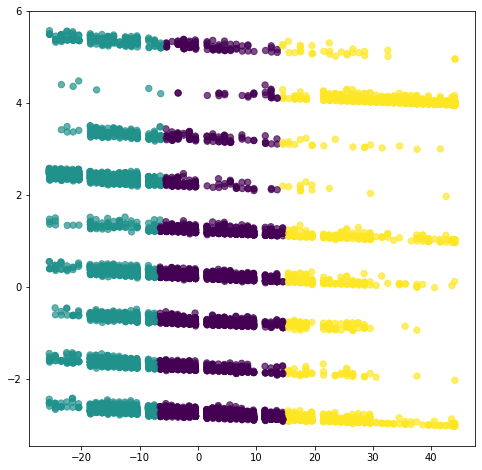

In [41]:
pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))
f, ax  = plt.subplots(figsize = (8,8))

kmeansmodel = KMeans(n_clusters= 3, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)

In [42]:
test.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [61]:
test.drop(['ID','Gender'],axis=1,inplace=True)

### Replacing Missing Values

In [44]:
mode=test['Spending_Score'].mode().values[0]
test['Spending_Score']=test['Spending_Score'].replace(np.nan,mode)

In [45]:
mode=test['Ever_Married'].mode().values[0]
test['Ever_Married']=test['Ever_Married'].replace(np.nan,mode)

In [46]:
mode=test['Graduated'].mode().values[0]
test['Graduated']=test['Graduated'].replace(np.nan,mode)

In [47]:
mode=test['Profession'].mode().values[0]
test['Profession']=test['Profession'].replace(np.nan,mode)

In [48]:
test['Work_Experience']=test['Work_Experience'].replace(to_replace='NaN', value=np.nan)
test['Work_Experience']=test['Work_Experience'].astype(float)
mean=test['Work_Experience'].mean()
test['Work_Experience'].replace(np.nan,mean,inplace=True)

In [49]:
test['Family_Size']=test['Family_Size'].replace(to_replace='NaN', value=np.nan)
test['Family_Size']=test['Family_Size'].astype(float)
mean=test['Family_Size'].mean()
test['Family_Size'].replace(np.nan,mean,inplace=True)

In [50]:
test['Age']=train['Age'].replace(to_replace=0, value=np.nan)
test['Age']=test['Age'].astype(float)
mean=test['Age'].mean()
test['Age'].replace(np.nan,mean,inplace=True)

In [51]:
mode=test['Var_1'].mode().values[0]
test['Var_1']=test['Var_1'].replace(np.nan,mode)

In [52]:
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

### Label Encoding

In [53]:
test['Ever_Married']= label_encoder.fit_transform(test['Ever_Married'])
test['Ever_Married'].unique()

array([1, 0])

In [54]:
test['Var_1']= label_encoder.fit_transform(test['Var_1'])
test['Var_1'].unique()

array([5, 3, 2, 0, 1, 4, 6])

In [55]:
test['Graduated']= label_encoder.fit_transform(test['Graduated'])
test['Graduated'].unique()

array([1, 0])

In [56]:
test['Profession']= label_encoder.fit_transform(test['Profession'])
test['Profession'].unique()

array([2, 5, 0, 4, 8, 1, 7, 3, 6])

In [57]:
test['Spending_Score']= label_encoder.fit_transform(test['Spending_Score'])
test['Spending_Score'].unique()

array([2, 0, 1])

### Scaling test data using MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['Work_Experience','Family_Size']

test[columns_to_normalize] = scaler.fit_transform(test[columns_to_normalize])
test.head(10)

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,22.0,1,2,0.000000,2,0.000,5
1,1,38.0,1,5,0.571429,0,0.375,5
2,1,67.0,0,0,0.000000,2,0.000,5
3,1,67.0,0,4,0.785714,1,0.125,5
4,0,40.0,0,8,0.182328,2,0.375,5
5,1,56.0,1,1,0.000000,1,0.500,3
6,1,32.0,1,1,0.357143,2,0.250,5
7,1,33.0,1,0,0.071429,0,0.250,5
8,1,61.0,1,0,0.142857,0,0.375,5
9,0,55.0,0,5,0.000000,2,0.375,5


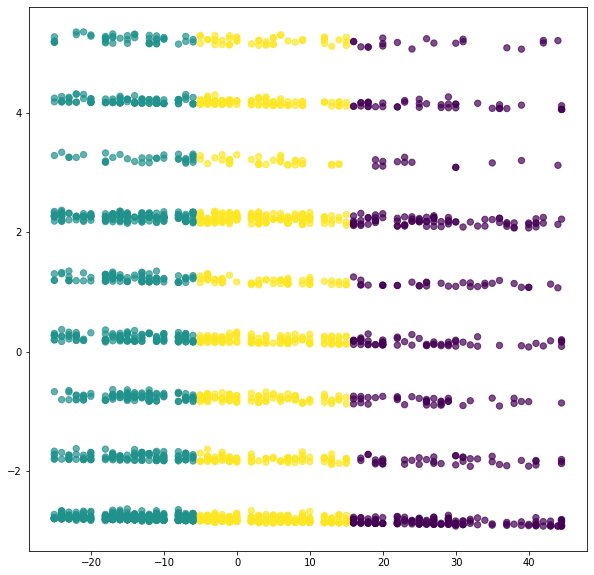

In [67]:
pca = decomposition.PCA(n_components=2)
X_reduced_test = pca.fit_transform(test.drop(columns=["Spending_Score"]))

f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 3, init='k-means++',random_state=0)
y_kmeans_test = kmeansmodel.fit_predict(X_reduced_test)
    
plt.scatter(X_reduced_test[:,0], X_reduced_test[:,1], c=y_kmeans_test, alpha=0.7, s=40)

### Hierarchical Clustering

In [77]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist
from scipy.stats import zscore

In [78]:
dfScaled=test.apply(zscore)
dfScaled.head(10)

,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.820517,-1.274509,0.784615,-0.306934,-8.065700e-01,0.738691,-1.202600,0.614978
1,0.820517,-0.307338,0.784615,0.853788,1.721281e+00,-1.633608,0.773867,0.614978
2,0.820517,1.445660,-1.274510,-1.080748,-8.065700e-01,0.738691,-1.202600,0.614978
3,0.820517,1.445660,-1.274510,0.466881,2.669225e+00,-0.447459,-0.543777,0.614978
4,-1.218744,-0.186441,-1.274510,2.014510,-1.227834e-16,0.738691,0.773867,0.614978
5,0.820517,0.780730,0.784615,-0.693841,-8.065700e-01,-0.447459,1.432690,-0.808411
6,0.820517,-0.670027,0.784615,-0.693841,7.733370e-01,0.738691,0.115045,0.614978
7,0.820517,-0.609579,0.784615,-1.080748,-4.905886e-01,-1.633608,0.115045,0.614978
8,0.820517,1.082970,0.784615,-1.080748,-1.746072e-01,-1.633608,0.773867,0.614978
9,-1.218744,0.720281,-1.274510,0.853788,-8.065700e-01,0.738691,0.773867,0.614978


In [84]:
z = linkage(dfScaled,metric="euclidean",method="single")
c,coph_dists=cophenet(z,pdist(dfScaled))

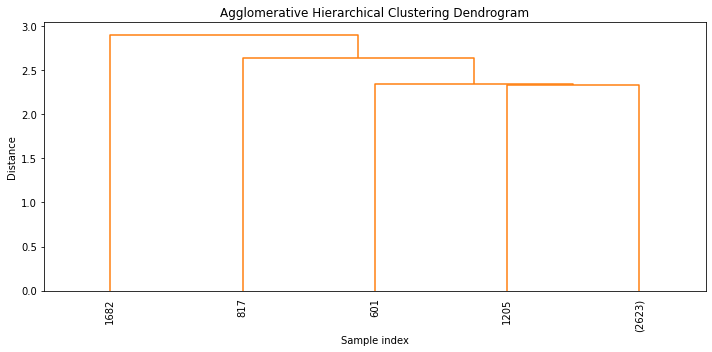

In [85]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation=90.,color_threshold=90,leaf_font_size=10.,p=3,truncate_mode='level')
plt.tight_layout()